In [1]:
from __future__ import division
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
import math
#from meep.materials import Au

# At above all required libraries are added

In [2]:
pml_layers= [mp.PML(1)]
Au = mp.Medium(index=math.pow(6.9,(1/2)))
dpml=1
sx=7
cell = mp.Vector3(7,2.04)
minwavelength=0.4
maxwavelength=0.8
minf=1/maxwavelength
maxf=1/minwavelength
fcen = (maxf+minf)/2  
df = maxf-minf
nfreq=100
resolution = 50

# Here definintions are made 
cellsize,pml,gold,frequencies,resolution

In [3]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(-2.5,0,0),
                     size=mp.Vector3(0,0.5,0))]
lightside_without_flux = []
otherside_without_flux = []
upperside_without_flux = []
lightside_with_flux = []
otherside_with_flux = []
upperside_with_flux = []

source is definied and empty fluxs arrays are generated

In [4]:
for i in (np.arange(1,6)):
    r=i*0.02
    sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
    lightside_fr = mp.FluxRegion(center=mp.Vector3(-0.2), 
                             size=mp.Vector3(0,0.4,0))
    lightside = sim.add_flux(fcen, df ,nfreq,lightside_fr)
    otherside_fr = mp.FluxRegion(center=mp.Vector3(+0.2), 
                             size=mp.Vector3(0,0.4,0))
    otherside = sim.add_flux(fcen, df ,nfreq,otherside_fr)
    upperside_fr = mp.FluxRegion(center=mp.Vector3(0,0.4),
                                    size=mp.Vector3(0.4,0,0)) 
    upperside = sim.add_flux(fcen,df,nfreq,upperside_fr)
    pt = mp.Vector3(0.5*sx-dpml-0.5,0)
    sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))
    lightside_without_flux = np.append(lightside_without_flux,mp.get_fluxes(lightside))
    otherside_without_flux = np.append(otherside_without_flux,mp.get_fluxes(otherside))
    upperside_without_flux = np.append(upperside_without_flux,mp.get_fluxes(upperside))
    sim.reset_meep()

    geometrys = [mp.Cylinder(material=Au,radius=r,center=mp.Vector3())]
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometrys,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
    lightside_fr = mp.FluxRegion(center=mp.Vector3(-0.2), 
                             size=mp.Vector3(0,0.4,0))
    lightside = sim.add_flux(fcen, df ,nfreq,lightside_fr)
    otherside_fr = mp.FluxRegion(center=mp.Vector3(+0.2), 
                             size=mp.Vector3(0,0.4,0))
    otherside = sim.add_flux(fcen, df ,nfreq,otherside_fr)
    upperside_fr = mp.FluxRegion(center=mp.Vector3(0,0.4),
                                    size=mp.Vector3(0.4,0,0)) 
    upperside = sim.add_flux(fcen,df,nfreq,upperside_fr)
    pt = mp.Vector3(0.5*sx-dpml-0.5,0)
    sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))
    lightside_with_flux = np.append(lightside_with_flux,mp.get_fluxes(lightside))
    otherside_with_flux = np.append(otherside_with_flux,mp.get_fluxes(otherside))
    upperside_with_flux = np.append(upperside_with_flux,mp.get_fluxes(upperside))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000134945 s
Working in 2D dimensions.
Computational cell is 7 x 2.04 x 0 with resolution 50
time for set_epsilon = 0.042428 s
-----------
field decay(t = 50.01): 0.026193528897848338 / 0.026193528897848338 = 1.0
field decay(t = 100.01): 3.543071945147124e-16 / 0.026193528897848338 = 1.3526516258899994e-14
run 0 finished at t = 100.01 (10001 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000147104 s
Working in 2D dimensions.
Computational cell is 7 x 2.04 x 0 with resolution 50
     cylinder, center = (0,0,0)
          radius 0.02, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.9,6.9,6.9)
time for set_epsilon = 0.0509071 s
-----------
field decay(t = 50.01): 0.027829112593620343 / 0.027829112593620343 = 1.0
field decay(t = 100.01): 3.1149607578849956e-16 / 0.027829112593620343 = 1.1193173147026907e-14
run 0 finished at t = 100.01 (10001 timesteps)

In [5]:
apsorbtions = (otherside_without_flux-otherside_with_flux)-(lightside_without_flux-lightside_with_flux)-2*(upperside_without_flux-upperside_with_flux)

In [6]:
apsorbtions[np.arange(0,100)]=(apsorbtions[np.arange(0,100)]/(np.max(apsorbtions[np.arange(0,100)])))
apsorbtions[np.arange(100,200)]=(apsorbtions[np.arange(100,200)]/(np.max(apsorbtions[np.arange(100,200)])))
apsorbtions[np.arange(200,300)]=(apsorbtions[np.arange(200,300)]/(np.max(apsorbtions[np.arange(200,300)])))
apsorbtions[np.arange(300,400)]=(apsorbtions[np.arange(300,400)]/(np.max(apsorbtions[np.arange(300,400)])))
apsorbtions[np.arange(400,500)]=(apsorbtions[np.arange(400,500)]/(np.max(apsorbtions[np.arange(400,500)])))


In [7]:
wavelengths = np.linspace(800,200,100) 

in early examples in meep documantation
they uses for for substarctions but as I found we can use normal substraction
also this aprroach is used in post-examples in meep 

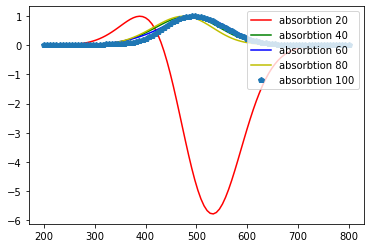

In [8]:
plt.figure()
plt.plot(wavelengths,apsorbtions[np.arange(0,100)],'r',label='absorbtion 20')
plt.plot(wavelengths,apsorbtions[np.arange(100,200)],'g',label='absorbtion 40')
plt.plot(wavelengths,apsorbtions[np.arange(200,300)],'b',label='absorbtion 60')
plt.plot(wavelengths,apsorbtions[np.arange(300,400)],'y',label='absorbtion 80')
plt.plot(wavelengths,apsorbtions[np.arange(400,500)],'p',label='absorbtion 100')
plt.legend(loc="upper right")
plt.show()

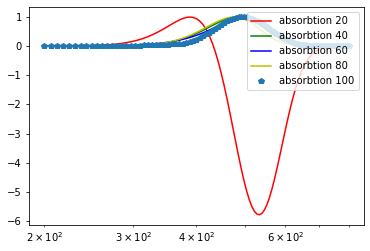

In [9]:
plt.figure()
plt.plot(wavelengths,apsorbtions[np.arange(0,100)],'r',label='absorbtion 20')
plt.plot(wavelengths,apsorbtions[np.arange(100,200)],'g',label='absorbtion 40')
plt.plot(wavelengths,apsorbtions[np.arange(200,300)],'b',label='absorbtion 60')
plt.plot(wavelengths,apsorbtions[np.arange(300,400)],'y',label='absorbtion 80')
plt.plot(wavelengths,apsorbtions[np.arange(400,500)],'p',label='absorbtion 100')
plt.legend(loc="upper right")
plt.xscale("log")
plt.show()